# Background

In [48]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt, seaborn as sns
import matplotlib as mpl
from scipy.stats import mannwhitneyu
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Gather Data

In [3]:
df=pd.read_csv('./dataset/country_vaccinations.csv')
print('Dataset read successfully')

Dataset read successfully


In [4]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [5]:
df.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
12151,Zimbabwe,ZWE,2021-04-12,234579.0,205275.0,29304.0,11087.0,12724.0,1.58,1.38,0.20,856.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1383174384...
12152,Zimbabwe,ZWE,2021-04-13,248355.0,218516.0,29839.0,13776.0,12246.0,1.67,1.47,0.20,824.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1383174384...
12153,Zimbabwe,ZWE,2021-04-14,262128.0,231632.0,30496.0,13773.0,11816.0,1.76,1.56,0.21,795.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1383174384...
12154,Zimbabwe,ZWE,2021-04-15,285881.0,252932.0,32949.0,23753.0,13172.0,1.92,1.70,0.22,886.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1383174384...
12155,Zimbabwe,ZWE,2021-04-16,304701.0,269732.0,34969.0,18820.0,14071.0,2.05,1.81,0.24,947.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1383174384...


### Basic Info Data

In [6]:
print('shape of data is:',df.shape)
print(df.info())

shape of data is: (12156, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12156 entries, 0 to 12155
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              12156 non-null  object 
 1   iso_code                             12156 non-null  object 
 2   date                                 12156 non-null  object 
 3   total_vaccinations                   7316 non-null   float64
 4   people_vaccinated                    6661 non-null   float64
 5   people_fully_vaccinated              4784 non-null   float64
 6   daily_vaccinations_raw               6158 non-null   float64
 7   daily_vaccinations                   11946 non-null  float64
 8   total_vaccinations_per_hundred       7316 non-null   float64
 9   people_vaccinated_per_hundred        6661 non-null   float64
 10  people_fully_vaccinated_per_hundred  4784 non-null   float64
 11

In [7]:
# counting missing values
df.isnull().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     4840
people_vaccinated                      5495
people_fully_vaccinated                7372
daily_vaccinations_raw                 5998
daily_vaccinations                      210
total_vaccinations_per_hundred         4840
people_vaccinated_per_hundred          5495
people_fully_vaccinated_per_hundred    7372
daily_vaccinations_per_million          210
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

there's some column have missing data

### Data Preprocessing

In [8]:
# missing value
# lets drop total_vaccinations missing value, without this any raw data doesnt make sense
prep_data = df.drop(df[df['total_vaccinations'].isna()].index)

In [9]:
prep_data.isnull().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                       756
people_fully_vaccinated                2537
daily_vaccinations_raw                 1158
daily_vaccinations                      182
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred           756
people_fully_vaccinated_per_hundred    2537
daily_vaccinations_per_million          182
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

we can see from above few data is corelated \
``people_vaccinated = people_vaccinated_per_hundred 
people_fully_vaccinated = people_fully_vaccinated_per_hundred 
daily_vaccinations = daily_vaccinations_per_million ``\
lets check the correlation plot

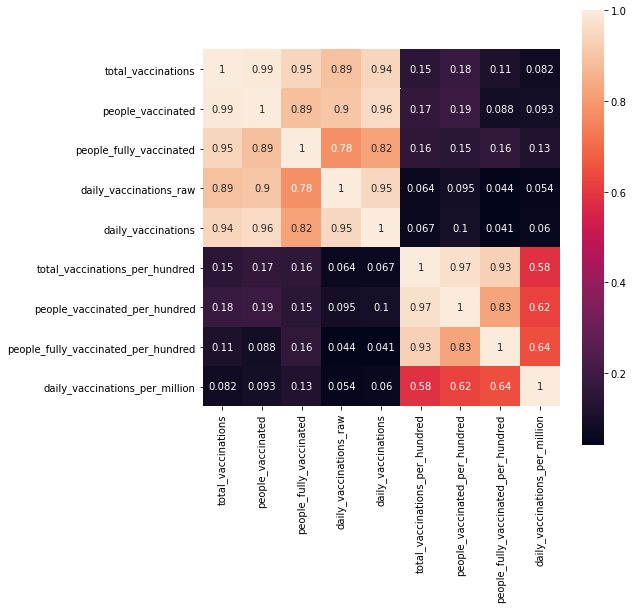

In [10]:
plt.subplots(figsize=(8, 8))
sns.heatmap(prep_data.corr(), annot=True, square=True)
plt.show()

from plot above we can see the features have almost ideal corelation

Correlation with visualisation

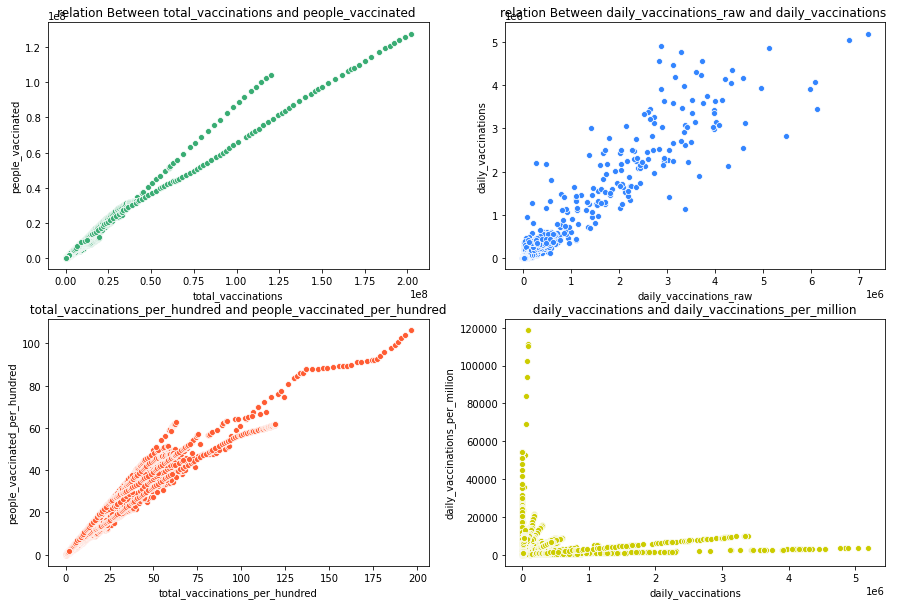

In [50]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
#fig 1
sns.scatterplot(df['total_vaccinations'], df['people_vaccinated'],ax=ax[0][0],color='#39ac73')
ax[0,0].set_title('relation Between total_vaccinations and people_vaccinated ')
#fig 2
sns.scatterplot(df['daily_vaccinations_raw'], df['daily_vaccinations'], color='#3385ff',ax=ax[0][1])
ax[0][1].set_title('relation Between daily_vaccinations_raw and daily_vaccinations ')
#fig 3
sns.scatterplot(df['total_vaccinations_per_hundred'], df['people_vaccinated_per_hundred'], color='#ff5c33',ax=ax[1][0])
ax[1][0].set_title(' total_vaccinations_per_hundred and people_vaccinated_per_hundred ')
#fig 4
sns.scatterplot( df['daily_vaccinations'],df['daily_vaccinations_per_million'], color='#cccc00',ax=ax[1][1])
ax[1][1].set_title(' daily_vaccinations and daily_vaccinations_per_million ')
plt.show()

Mann-whitney U Test

- people_vaccinated and people_vaccinated_per_hundred \
h0 = people_vaccinated and people_vaccinated_per_hundred **correlates** with total_vaccinations and total_vaccinations_per_hundred. \
h1 = people_vaccinated and people_vaccinated_per_hundred **not correlates** with total_vaccinations and total_vaccinations_per_hundred.

In [11]:
data1 = prep_data.total_vaccinations
data2 = prep_data.people_vaccinated
stat, p = mannwhitneyu(data1, data2, alternative='two-sided')
print('p=',p)
print('stat=%.3f' % (stat))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

p= 8.370103780612713e-12
stat=25016503.500
Probably different distributions


In [12]:
data3 = prep_data.total_vaccinations_per_hundred
data4 = prep_data.people_vaccinated_per_hundred
stat2, p2 = mannwhitneyu(data3, data4, alternative='two-sided')
print('p=',p2)
print('stat=%.3f' % (stat2))
if p2 > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

p= 5.279362851149261e-07
stat=25480504.500
Probably different distributions


based on test above we can reject our null hypothesis, lets fill null with 0

In [13]:
# diff = prep_data.total_vaccinations.mean() - prep_data.people_vaccinated.mean()
# diff_hundred = prep_data.total_vaccinations_per_hundred.mean() - prep_data.people_vaccinated_per_hundred.mean()
# print('diff ',diff,'| diff_hundred ',diff_hundred)

# prep_data.people_vaccinated = prep_data.people_vaccinated.fillna(prep_data.total_vaccinations-diff)
# prep_data.people_vaccinated_per_hundred = prep_data.people_fully_vaccinated_per_hundred.fillna(prep_data.total_vaccinations_per_hundred-diff_hundred)

In [14]:
prep_data.people_vaccinated_per_hundred = prep_data.people_fully_vaccinated_per_hundred.fillna(0)
prep_data.people_vaccinated = prep_data.people_vaccinated.fillna(0)


In [15]:
# lets check
prep_data.isnull().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                2537
daily_vaccinations_raw                 1158
daily_vaccinations                      182
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred             0
people_fully_vaccinated_per_hundred    2537
daily_vaccinations_per_million          182
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

- daily_vaccinations and daily_vaccinations_per_million \
h0 = daily_vaccinations and daily_vaccinations_per_million **correlates** with people_vaccinated and total_vaccinations_per_hundred. \
h1 = daily_vaccinations and daily_vaccinations_per_million **not correlates** with people_vaccinated and total_vaccinations_per_hundred.

In [16]:
data5 = prep_data.daily_vaccinations
data6 = prep_data.people_vaccinated
stat3, p3 = mannwhitneyu(data5, data6)
print('p=',p3)
print('stat=%.3f' % (stat3))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

p= 0.0
stat=15408191.500
Probably different distributions


In [17]:
data7 = prep_data.daily_vaccinations_per_million
data8 = prep_data.people_vaccinated_per_hundred
stat4, p4 = mannwhitneyu(data7, data8)
print('p=',p4)
print('stat=%.3f' % (stat4))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

p= 0.0
stat=338580.500
Probably different distributions


based on second test above we can reject our null hypothesis, lets fill null with 0

In [18]:
prep_data.daily_vaccinations = prep_data.daily_vaccinations.fillna(0)
prep_data.daily_vaccinations_per_million = prep_data.daily_vaccinations_per_million.fillna(0)

In [19]:
# lets check
prep_data.isnull().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                2537
daily_vaccinations_raw                 1158
daily_vaccinations                        0
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred             0
people_fully_vaccinated_per_hundred    2537
daily_vaccinations_per_million            0
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

- people_fully_vaccinated and people_fully_vaccinated_per_hundred \
h0 = people_fully_vaccinated and people_fully_vaccinated_per_hundred **correlates** with total_vaccinations and total_vaccinations_per_hundred. \
h1 = people_fully_vaccinated and people_fully_vaccinated_per_hundred **not correlates** with total_vaccinations and total_vaccinations_per_hundred.

In [20]:
data9 = prep_data.people_fully_vaccinated
data10 = prep_data.total_vaccinations
stat5, p5 = mannwhitneyu(data9, data10)
print('p=',p5)
print('stat=%.3f' % (stat5))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

p= 5.120668189218756e-111
stat=21050167.000
Probably different distributions


In [21]:
data11 = prep_data.people_fully_vaccinated_per_hundred
data12 = prep_data.total_vaccinations_per_hundred
stat6, p6 = mannwhitneyu(data10, data11)
print('p=',p6)
print('stat=%.3f' % (stat6))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

p= 8.686704644163495e-196
stat=19141836.000
Probably different distributions


again, based on third test above we can reject our null hypothesis, lets fill null with 0

In [22]:
prep_data.people_fully_vaccinated = prep_data.people_fully_vaccinated.fillna(0)
prep_data.people_fully_vaccinated_per_hundred = prep_data.people_fully_vaccinated_per_hundred.fillna(0)

In [23]:
# lets check
prep_data.isnull().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                   0
daily_vaccinations_raw                 1158
daily_vaccinations                        0
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred             0
people_fully_vaccinated_per_hundred       0
daily_vaccinations_per_million            0
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

- daily_vaccinations_raw\
h0 = daily_vaccinations_raw **correlates** with daily_vaccinations. \
h1 = daily_vaccinations_raw **not correlates** with daily_vaccinations. \


In [24]:
data13 = prep_data.daily_vaccinations_raw
data14 = prep_data.daily_vaccinations
stat7, p7 = mannwhitneyu(data13, data14)
print('p=',p7)
print('stat=%.3f' % (stat7))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

p= 3.56132066004629e-100
stat=21342352.500
Probably different distributions


based on fourth test above we can reject our null hypothesis, lets fill null with 0

In [25]:
prep_data.daily_vaccinations_raw = prep_data.daily_vaccinations_raw.fillna(0)

In [26]:
# lets check
prep_data.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

### Data Visualization
question:
1. What is most vaccine being used? 
2. Amount of vaccinated people by Countries

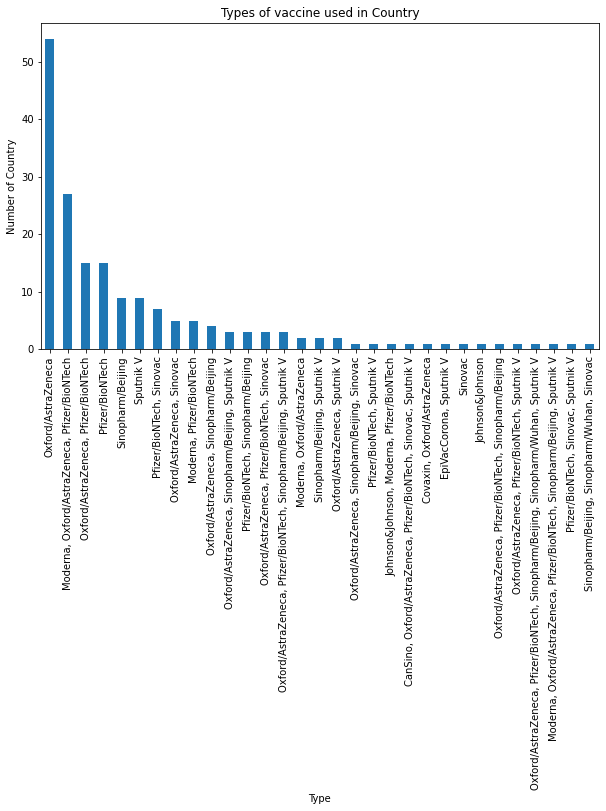

In [27]:
df3 = prep_data[['country','vaccines']]
df3 = df3.drop_duplicates()
df4 = df3['vaccines'].value_counts()
df4

# df1.reset_index()
df4.plot(kind='bar', figsize=(10, 6))
plt.title('Types of vaccine used in Country') # add a title to the area plot
plt.ylabel('Number of Country') # add y-label
plt.xlabel('Type') # add x-label

plt.show()

In [28]:
df5 = prep_data.iloc[:, 0:8]
df5

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,1367.0
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,0.0,0.0,2862.0
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,0.0,0.0,3000.0
45,Albania,ALB,2021-01-10,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
12151,Zimbabwe,ZWE,2021-04-12,234579.0,205275.0,29304.0,11087.0,12724.0
12152,Zimbabwe,ZWE,2021-04-13,248355.0,218516.0,29839.0,13776.0,12246.0
12153,Zimbabwe,ZWE,2021-04-14,262128.0,231632.0,30496.0,13773.0,11816.0
12154,Zimbabwe,ZWE,2021-04-15,285881.0,252932.0,32949.0,23753.0,13172.0


In [29]:
prep_data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,1367.0,0.02,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,0.0,0.0,2862.0,0.14,0.0,0.0,74.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,0.0,0.0,3000.0,0.31,0.0,0.0,77.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
45,Albania,ALB,2021-01-10,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,"Pfizer/BioNTech, Sinovac",Ministry of Health,https://twitter.com/gmanastirliu/status/138313...


In [30]:
dt6 = prep_data
#now we have added one more columns that is difference of date
dt6['date_diff']=dt6['total_vaccinations']
count=0
for index, row in dt6.iterrows():
    row['date_diff']=count
    count+=1

In [36]:
dt6

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,date_diff
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,0.0
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,1367.0,0.02,0.00,0.00,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,8200.0
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,0.0,0.0,2862.0,0.14,0.00,0.00,74.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,54000.0
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,0.0,0.0,3000.0,0.31,0.00,0.00,77.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,120000.0
45,Albania,ALB,2021-01-10,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Pfizer/BioNTech, Sinovac",Ministry of Health,https://twitter.com/gmanastirliu/status/138313...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12151,Zimbabwe,ZWE,2021-04-12,234579.0,205275.0,29304.0,11087.0,12724.0,1.58,0.20,0.20,856.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1383174384...,234579.0
12152,Zimbabwe,ZWE,2021-04-13,248355.0,218516.0,29839.0,13776.0,12246.0,1.67,0.20,0.20,824.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1383174384...,248355.0
12153,Zimbabwe,ZWE,2021-04-14,262128.0,231632.0,30496.0,13773.0,11816.0,1.76,0.21,0.21,795.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1383174384...,262128.0
12154,Zimbabwe,ZWE,2021-04-15,285881.0,252932.0,32949.0,23753.0,13172.0,1.92,0.22,0.22,886.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1383174384...,285881.0


In [40]:
#creating model
model=LinearRegression()
# lets create our x and Y variable
x=dt6[['date_diff']]
y=dt6['total_vaccinations']
res = model.fit(x,y)
print(res.coef_)
print(res.intercept_)

[1.]
-8.847564458847046e-09


In [41]:
#lets predict after 1 year how many vaccines will be made i.e 365 days so our x value will be 365
pr=model.predict(x)
print(pr)

[-8.84756446e-09  8.20000000e+03  5.40000000e+04 ...  2.62128000e+05
  2.85881000e+05  3.04701000e+05]


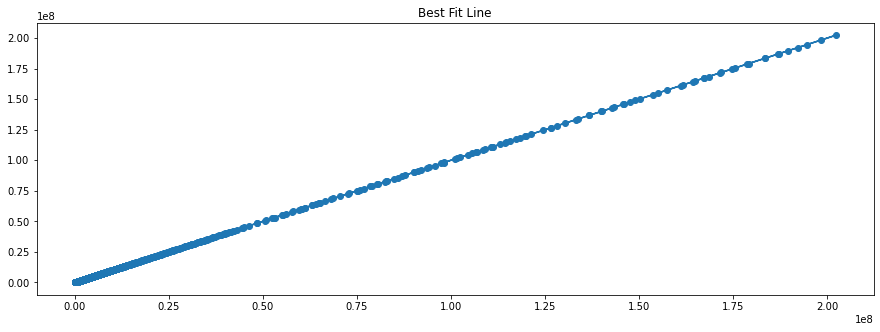

In [42]:
#lets visualize our total vaccination by day
fig,ax=plt.subplots(figsize=(15,5))
plt.title('Best Fit Line')
plt.scatter(x=dt6['date_diff'],y=dt6['total_vaccinations'])
plt.plot(x,pr)

analyst : based on plot above, total vacinate is straight with date diff

In [43]:
# lets predict for after 1000 days

print(int(model.predict([[1000]])))

999


analyst : value we got from prediction represent to best fit line plot. 

Thus, we would predict 999 will be complete in 1000 days ahead.


How Well Does the Model Fit the data?

In [46]:
res.score(x, y)

1.0

Model Evaluation Metrics for Regression

In [49]:
# define true and predicted response values
y_true = [100, 1000, 100000, 1000000]
y_pred = [99, 999, 9999, 99999]

# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_true, y_pred))
print(metrics.mean_squared_error(y_true, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_true, y_pred)))



247501.0
204525495001.0
452244.95022166916
